<a href="https://colab.research.google.com/github/melanieganz/ReproducibleQuantitativeDataAnalysis-2025/blob/main/provenance/ProvenanceInPractice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Provenance in Practice

Let's make a very simple example showcasing the need for provenance in practice!

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression
# Set the style to whitegrid
sns.set_style('whitegrid')

## Data

I will provide you with some data. I will claim this shows the association between temperature measured during summer days in Copenhagen and how many scoops of ice cream I eat.

In [3]:
rng = np.random.RandomState(1)
x = 30 * rng.rand(50)
y = 1/12 * x + rng.randn(50) + 1

# ice cream consumption
ICC = pd.DataFrame({'temperature [Celsius]': x,
                       'ice cream [# scoops]': y})

We can look at the data inside the pandas dataframe:

In [4]:
ICC

,temperature [Celsius],ice cream [# scoops]
0,12.510660,1.355382
1,21.609735,1.955606
2,0.003431,0.329040
3,9.069977,1.743167
4,4.402677,0.249579
5,2.770158,1.465262
6,5.587806,3.125453
7,10.366822,2.605946
8,11.903024,1.800083
9,16.164502,1.459413


We can also easily visualize the data:

We can also save the data as a .csv file.

In [6]:
ICC.to_csv('MelsIceCreamHabits.csv')

In [23]:
ICC = pd.read_csv('MelsIceCreamHabits.csv', index_col=0)
ICC = ICC.loc[ICC['ice cream [# scoops]'] > 0]

Text(0, 0.5, 'Scoops of ice cream Melanie eats [# of scoops]')

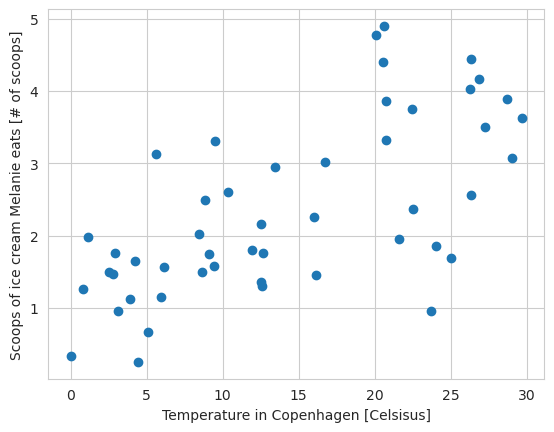

In [24]:
plt.scatter(ICC['temperature [Celsius]'], ICC['ice cream [# scoops]']);
plt.xlabel('Temperature in Copenhagen [Celsisus]')
plt.ylabel('Scoops of ice cream Melanie eats [# of scoops]')

In [25]:
ICC.head()

,temperature [Celsius],ice cream [# scoops]
0,12.510660,1.355382
1,21.609735,1.955606
2,0.003431,0.329040
3,9.069977,1.743167
4,4.402677,0.249579


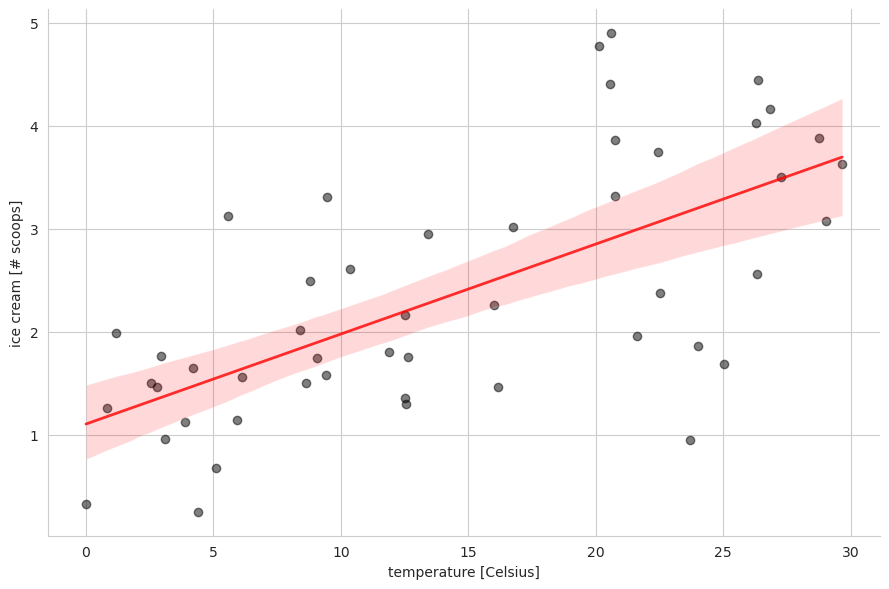

In [26]:
sns.lmplot(x='temperature [Celsius]', y='ice cream [# scoops]', data=ICC,
           scatter_kws={'alpha': 0.5, 'color': 'black'},
           line_kws={'color': 'red', 'lw': 2, 'alpha':  0.8},
           height=6, aspect=1.5)

In [27]:
temps = ICC['temperature [Celsius]'].values.reshape(-1, 1)
icecream = ICC['ice cream [# scoops]'].values.reshape(-1, 1)

In [28]:
# Create and fit the model:
model = LinearRegression()
model.fit(temps, icecream)

# Predict weights using the model:
predicted_weights = model.predict(temps)

In [29]:
print("Slope:    ", model.coef_[0])
print("Intercept:", model.intercept_)

Slope:     [0.08743318]
Intercept: [1.10201308]


In [30]:
temp = 40
print(f"Predicted weight for height = {temp}: ", model.predict([[temp]]))

Predicted weight for height = 40:  [[4.59934032]]


In [36]:
# Use a polynomial regression model
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2)
temps_poly = poly.fit_transform(temps)
model_poly = LinearRegression()
model_poly.fit(temps_poly, icecream)    

predicted_weights_poly = model_poly.predict(temps_poly)
temp_poly = poly.transform([[temp]])
print(f"Predicted weight for height = {temp}: ", model_poly.predict(temp_poly))

Predicted weight for height = 40:  [[4.01598771]]


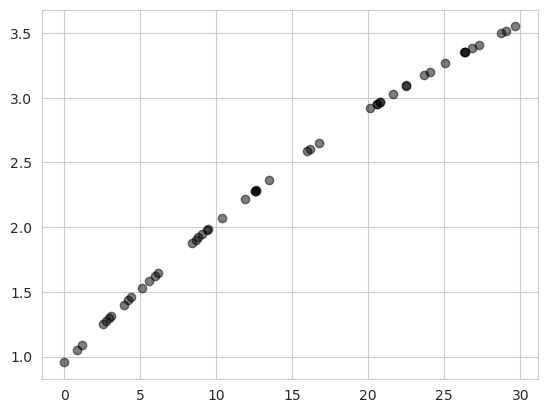

In [37]:
plt.scatter(temps, predicted_weights_poly, label='Data', color='black', alpha=0.5)

In [35]:
temps.shape, predicted_weights_poly.shape

((49, 1), (50, 1))

## Conclusion of Melanie's Data Analysis

Now I have analyzed this data and come to the following conlusion:

Whenever the temperature hits 40 degrees Celsius in Copenhagen, Melanie will eat 5.7 scoops of ice cream.

I formatted the data nicely for you, so it's not a problem at all to understand what I did, right?

## Can you arrive at the same conclusion?

Let's see if you can! I gave you the data and a simple problem, try and reproduce my "scientific" result.